## Trial of Time Series Analysis by Tensorflow Probability - Autoregressive Model
#### Based on https://bayesiancomputationbook.com/markdown/chp_06.html#autoregressive-models

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_probability as tfp
import arviz as az

In [4]:
n_t = 200

In [5]:
# %load 'ar1_with_forloop_coroutine.py'
import tensorflow as tf
import tensorflow_probability as tfp

@tfp.distributions.JointDistributionCoroutine
def ar1_with_forloop():
    sigma = yield tfp.distributions.JointDistributionCoroutine.Root(
                    tfp.distributions.HalfNormal(1.))
    rho = yield tfp.distributions.JointDistributionCoroutine.Root(
                    tfp.distributions.Uniform(-1., 1.))
    x0 = yield tfp.distributions.Normal(0., sigma)
    x = [x0]
    for i in range(1, n_t):
        x_i = yield tfp.distributions.Normal(x[i-1] * rho, sigma)
        x.append(x_i)

In [6]:
nplot = 4

In [7]:
test_samples = ar1_with_forloop.sample(value=(1., -1.01))

2022-08-12 17:27:54.298199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
test_samples

StructTuple(
  var0=<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
  var1=<tf.Tensor: shape=(), dtype=float32, numpy=-1.01>,
  var2=<tf.Tensor: shape=(), dtype=float32, numpy=-0.35426158>,
  var3=<tf.Tensor: shape=(), dtype=float32, numpy=0.38022786>,
  var4=<tf.Tensor: shape=(), dtype=float32, numpy=-0.4501284>,
  var5=<tf.Tensor: shape=(), dtype=float32, numpy=1.4324911>,
  var6=<tf.Tensor: shape=(), dtype=float32, numpy=-0.53527635>,
  var7=<tf.Tensor: shape=(), dtype=float32, numpy=0.072173834>,
  var8=<tf.Tensor: shape=(), dtype=float32, numpy=-0.13428082>,
  var9=<tf.Tensor: shape=(), dtype=float32, numpy=0.28240037>,
  var10=<tf.Tensor: shape=(), dtype=float32, numpy=-0.2436273>,
  var11=<tf.Tensor: shape=(), dtype=float32, numpy=-0.52797914>,
  var12=<tf.Tensor: shape=(), dtype=float32, numpy=0.09646973>,
  var13=<tf.Tensor: shape=(), dtype=float32, numpy=-0.86975735>,
  var14=<tf.Tensor: shape=(), dtype=float32, numpy=1.9726083>,
  var15=<tf.Tensor: shape=(), dtype=float32, 

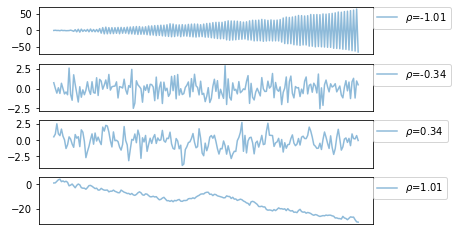

In [9]:
fig, axes = plt.subplots(nplot, 1)
for ax, rho in zip(axes, np.linspace(-1.01, 1.01, nplot)):
    test_samples = ar1_with_forloop.sample(value=(1., rho))
    ar1_samples = tf.stack(test_samples[2:])
    ax.plot(ar1_samples, alpha=.5, label=r'$\rho$=%.2f' % rho)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left',
              borderaxespad=0., fontsize=10)
    ax.get_xaxis().set_visible(False)
    
plt.savefig("../plots/ar1_process.png")

#### ar1_without_forloop

In [10]:
x = tf.zeros([n_t], dtype=float)

In [11]:
x

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [12]:
x[..., :1]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [13]:
tf.zeros_like(x[..., :1])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [14]:
x[..., :-1]

<tf.Tensor: shape=(199,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [15]:
[tf.zeros_like(x[..., :1]), x[..., :-1]]

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(199,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [16]:
tf.concat([tf.zeros_like(x[..., :1]), x[..., :-1]], axis=-1)

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [17]:
# %load 'ar1_without_forloop_coroutine.py'
import tensorflow as tf
import tensorflow_probability as tfp

@tfp.distributions.JointDistributionCoroutine
def ar1_without_forloop():
    sigma = yield tfp.distributions.JointDistributionCoroutine.Root(
                    tfp.distributions.HalfNormal(1.))
    rho = yield tfp.distributions.JointDistributionCoroutine.Root(
                    tfp.distributions.Uniform(-1., 1.))
    
    def ar1_fun(x):
        x_tm1 = tf.concat([tf.zeros_like(x[..., :1]), x[..., :-1]], axis=-1)
        loc = x_tm1 * rho[..., None]
        return tfp.distributions.Independent(tfp.distributions.Normal(
            loc=loc, scale=sigma[..., None]),
            reinterpreted_batch_ndims=1)
    
    dist = yield tfp.distributions.Autoregressive(
        distribution_fn=ar1_fun, 
        sample0=tf.zeros([n_t], dtype=rho.dtype), 
        num_steps=n_t)

In [18]:
seed = [1000, 5234]

In [19]:
rho = np.linspace(-1.01, 1.01, 5)

In [20]:
rho

array([-1.01 , -0.505,  0.   ,  0.505,  1.01 ])

In [21]:
sigma = np.ones(5)

In [22]:
sigma

array([1., 1., 1., 1., 1.])

In [23]:
test_samples = ar1_without_forloop.sample(value=(sigma, rho), seed=seed)

In [24]:
test_samples

StructTuple(
  var0=<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>,
  var1=<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-1.01 , -0.505,  0.   ,  0.505,  1.01 ], dtype=float32)>,
  var2=<tf.Tensor: shape=(5, 200), dtype=float32, numpy=
    array([[ 3.44785392e-01, -8.60881507e-02, -1.23246884e+00,
             2.47080469e+00, -2.49256015e+00,  1.20700562e+00,
            -1.42001390e-01,  2.04051304e+00,  2.12692499e-01,
            -4.86151338e-01,  6.63698733e-01, -1.22590375e+00,
             1.05322814e+00, -1.50317132e+00,  8.61204505e-01,
            -1.92104816e+00,  3.10184145e+00, -3.87976027e+00,
             3.72692418e+00, -4.88486385e+00,  4.78339195e+00,
            -5.11738253e+00,  4.84870052e+00, -6.94474125e+00,
             6.02318764e+00, -6.51229429e+00,  7.74266052e+00,
            -6.93849325e+00,  6.84686565e+00, -6.50420570e+00,
             6.95705557e+00, -6.18807364e+00,  6.70170116e+00,
            -7.12384415

In [25]:
test_samples[-1]

<tf.Tensor: shape=(5, 200), dtype=float32, numpy=
array([[ 3.44785392e-01, -8.60881507e-02, -1.23246884e+00,
         2.47080469e+00, -2.49256015e+00,  1.20700562e+00,
        -1.42001390e-01,  2.04051304e+00,  2.12692499e-01,
        -4.86151338e-01,  6.63698733e-01, -1.22590375e+00,
         1.05322814e+00, -1.50317132e+00,  8.61204505e-01,
        -1.92104816e+00,  3.10184145e+00, -3.87976027e+00,
         3.72692418e+00, -4.88486385e+00,  4.78339195e+00,
        -5.11738253e+00,  4.84870052e+00, -6.94474125e+00,
         6.02318764e+00, -6.51229429e+00,  7.74266052e+00,
        -6.93849325e+00,  6.84686565e+00, -6.50420570e+00,
         6.95705557e+00, -6.18807364e+00,  6.70170116e+00,
        -7.12384415e+00,  7.93165445e+00, -7.43469381e+00,
         7.82046509e+00, -7.18125248e+00,  9.24216175e+00,
        -8.38435459e+00,  9.39406681e+00, -8.75316143e+00,
         9.27652740e+00, -1.02194996e+01,  1.11905994e+01,
        -1.15695257e+01,  1.20885820e+01, -1.31839876e+01,
      

In [26]:
ar1_samples = tf.transpose(test_samples[-1])

In [27]:
ar1_samples

<tf.Tensor: shape=(200, 5), dtype=float32, numpy=
array([[ 3.44785392e-01, -1.13944530e+00, -4.67819631e-01,
        -1.24911654e+00, -2.13509481e-02],
       [-8.60881507e-02,  1.62911606e+00,  2.20245123e+00,
        -1.19737208e-01,  1.86624086e+00],
       [-1.23246884e+00, -1.37089765e+00, -1.37613431e-01,
        -1.08031034e+00,  4.38599682e+00],
       [ 2.47080469e+00,  6.82878137e-01,  1.21424520e+00,
        -2.81187266e-01,  4.18013239e+00],
       [-2.49256015e+00, -4.85588431e-01,  5.09596802e-02,
        -2.05557466e-01,  4.62294579e+00],
       [ 1.20700562e+00,  1.97009492e+00,  4.22588021e-01,
        -6.13411009e-01,  5.40960312e+00],
       [-1.42001390e-01, -8.95415783e-01,  1.27844423e-01,
         1.09501457e+00,  6.73054981e+00],
       [ 2.04051304e+00,  1.11713493e+00, -3.66249353e-01,
         1.13970160e-01,  8.15732288e+00],
       [ 2.12692499e-01,  2.02445686e-01, -2.26307828e-02,
        -1.42255938e+00,  9.79675198e+00],
       [-4.86151338e-01, -1.0782

Text(0.5, 1.0, 'AR(1) process with varies autoregressive coefficientt (rho)')

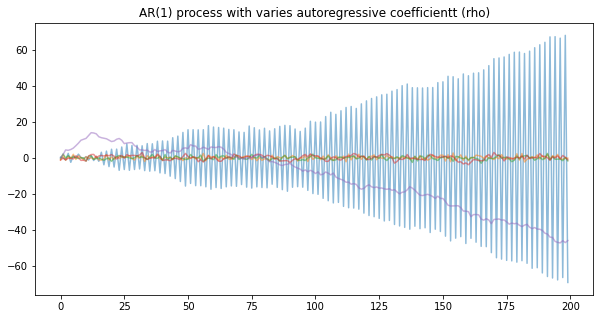

In [28]:
_, ax = plt.subplots(figsize=(10, 5))
ax.plot(ar1_samples, alpha=.5)
ax.set_title('AR(1) process with varies autoregressive coefficientt (rho)')

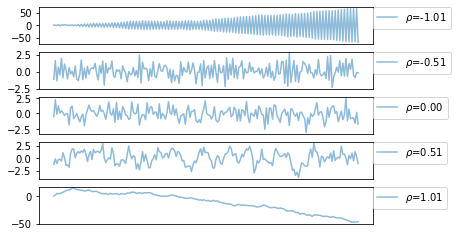

In [29]:
fig, axes = plt.subplots(5, 1)
for i, ax, rho_element in zip(range(5), axes, rho):
    ax.plot(test_samples[-1][i], alpha=.5, label=r'$\rho$=%.2f' % rho_element)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left',
              borderaxespad=0., fontsize=10)
    ax.get_xaxis().set_visible(False)
    
plt.savefig("../plots/ar1_process_without_loop.png")

#### Implement with lag operator

In [30]:
np.ones(5 - 1)

array([1., 1., 1., 1.])

In [31]:
matrix_b = np.diag(np.ones(5 - 1), -1)

In [32]:
matrix_b

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [33]:
matrix_b @ matrix_b

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [34]:
# %load 'ar1_lag_operator.py'
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
root = tfd.JointDistributionCoroutine.Root

lag_operator_b = np.diag(np.ones(n_t - 1), -1)

@tfd.JointDistributionCoroutine
def ar1_lag_operator():
    sigma = yield root(tfd.HalfNormal(1., name='sigma'))
    rho = yield root(tfd.Uniform(-1., 1., name='rho'))
    
    def ar1_fun(x):
        loc = tf.einsum('ij,...j->...i', lag_operator_b, x) * rho[..., None]
        return tfd.Independent(tfd.Normal(loc=loc, scale=sigma[..., None]),
                               reinterpreted_batch_ndims=1)
    
    dist = yield tfd.Autoregressive( distribution_fn=ar1_fun,
            sample0=tf.zeros([n_t], dtype=rho.dtype),
            num_steps=n_t,
            name="ar1")

In [35]:
rho = np.linspace(-1.01, 1.01, 5)

In [36]:
rho

array([-1.01 , -0.505,  0.   ,  0.505,  1.01 ])

In [37]:
sigma = np.ones(5)

In [38]:
sigma

array([1., 1., 1., 1., 1.])

In [39]:
test_samples = ar1_lag_operator.sample(value=(sigma, rho), seed=seed)

In [40]:
test_samples

StructTuple(
  sigma=<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>,
  rho=<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-1.01 , -0.505,  0.   ,  0.505,  1.01 ], dtype=float32)>,
  ar1=<tf.Tensor: shape=(5, 200), dtype=float32, numpy=
    array([[ 3.44785392e-01, -8.60881507e-02, -1.23246884e+00,
             2.47080469e+00, -2.49256015e+00,  1.20700562e+00,
            -1.42001390e-01,  2.04051304e+00,  2.12692499e-01,
            -4.86151338e-01,  6.63698733e-01, -1.22590375e+00,
             1.05322814e+00, -1.50317132e+00,  8.61204505e-01,
            -1.92104816e+00,  3.10184145e+00, -3.87976027e+00,
             3.72692418e+00, -4.88486385e+00,  4.78339195e+00,
            -5.11738253e+00,  4.84870052e+00, -6.94474125e+00,
             6.02318764e+00, -6.51229429e+00,  7.74266052e+00,
            -6.93849325e+00,  6.84686565e+00, -6.50420570e+00,
             6.95705557e+00, -6.18807364e+00,  6.70170116e+00,
            -7.12384415e

In [41]:
ar1_samples = tf.transpose(test_samples[-1])

In [42]:
ar1_samples

<tf.Tensor: shape=(200, 5), dtype=float32, numpy=
array([[ 3.44785392e-01, -1.13944530e+00, -4.67819631e-01,
        -1.24911654e+00, -2.13509481e-02],
       [-8.60881507e-02,  1.62911606e+00,  2.20245123e+00,
        -1.19737208e-01,  1.86624086e+00],
       [-1.23246884e+00, -1.37089765e+00, -1.37613431e-01,
        -1.08031034e+00,  4.38599682e+00],
       [ 2.47080469e+00,  6.82878137e-01,  1.21424520e+00,
        -2.81187266e-01,  4.18013239e+00],
       [-2.49256015e+00, -4.85588431e-01,  5.09596802e-02,
        -2.05557466e-01,  4.62294579e+00],
       [ 1.20700562e+00,  1.97009492e+00,  4.22588021e-01,
        -6.13411009e-01,  5.40960312e+00],
       [-1.42001390e-01, -8.95415783e-01,  1.27844423e-01,
         1.09501457e+00,  6.73054981e+00],
       [ 2.04051304e+00,  1.11713493e+00, -3.66249353e-01,
         1.13970160e-01,  8.15732288e+00],
       [ 2.12692499e-01,  2.02445686e-01, -2.26307828e-02,
        -1.42255938e+00,  9.79675198e+00],
       [-4.86151338e-01, -1.0782

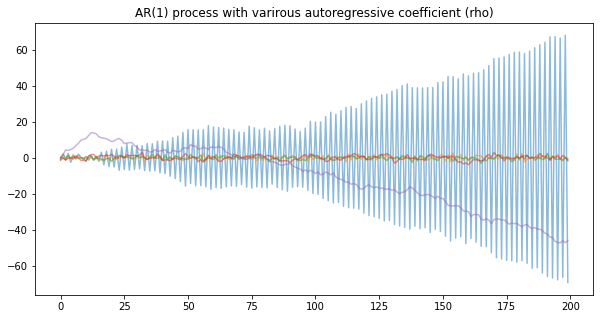

In [43]:
_, ax = plt.subplots(figsize=(10, 5))
ax.plot(ar1_samples, alpha=.5)
ax.set_title('AR(1) process with varirous autoregressive coefficient (rho)');

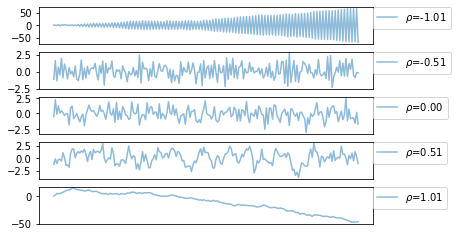

In [44]:
fig, axes = plt.subplots(5, 1)
for i, ax, rho_element in zip(range(5), axes, rho):
    ax.plot(test_samples[-1][i], alpha=.5, label=r'$\rho$=%.2f' % rho_element)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left',
              borderaxespad=0., fontsize=10)
    ax.get_xaxis().set_visible(False)
    
plt.savefig("../plots/ar1_process_lag_operator.png")

#### Use GAM

In [45]:
n_changepoints = 12

In [46]:
# %load 'co2_by_month_data.py'
import numpy as np
import pandas as pd

def co2_by_month_data():

    co2_by_month = pd.read_csv("../data/monthly_mauna_loa_co2_20220721.csv", 
                               comment='#')
    co2_by_month['year_string'] = co2_by_month['year'].astype(str)
    co2_by_month['month_string'] = co2_by_month['month'].astype(str)
    co2_by_month['date_month'] = pd.to_datetime(co2_by_month['year_string'] 
                                        + '/' + co2_by_month['month_string'])
    co2_by_month.set_index('date_month', drop=True, inplace=True)
    co2_by_month.drop(columns=['year', 'month', 'year_string', 
                               'month_string'], inplace=True)
    co2_by_month['CO2'] = co2_by_month['average'].astype(np.float32)
    co2_by_month.drop(columns=['decimal date', 'average', 'deseasonalized', 
                               'ndays', 'sdev', 'unc'], inplace=True)

    num_forecast_steps = 12 * 10 # Forecast the final ten years
    co2_by_month_training_data = co2_by_month[:-num_forecast_steps]
    co2_by_month_testing_data = co2_by_month[-num_forecast_steps:]
    
    num_forecast_steps = 12 * 10 # Forecast the final ten years
    trend_all = np.linspace(0., 1., len(co2_by_month))[..., None]
    trend_all = trend_all.astype(np.float32)
    seasonality_all = pd.get_dummies(
       co2_by_month.index.month).values.astype(np.float32)
    trend = trend_all[:-num_forecast_steps, :]
    seasonality = seasonality_all[:-num_forecast_steps, :]
    
    return (co2_by_month, co2_by_month_training_data, 
            co2_by_month_testing_data, trend_all, seasonality_all, 
            trend, seasonality)

In [47]:
(co2_by_month, co2_by_month_training_data, 
co2_by_month_testing_data, trend_all, seasonality_all, 
trend, seasonality) = co2_by_month_data()

In [48]:
co2_by_month

,CO2
date_month,
1958-03-01,315.700012
1958-04-01,317.450012
1958-05-01,317.510010
1958-06-01,317.239990
1958-07-01,315.859985
...,...
2022-02-01,419.279999
2022-03-01,418.809998
2022-04-01,420.230011


##### Generate trend design matrix for GAM

In [49]:
n_tp = seasonality_all.shape[0]

In [50]:
n_tp

772

In [51]:
t = np.linspace(0, 1, n_tp, dtype=np.float32)

In [52]:
t

array([0.        , 0.00129702, 0.00259403, 0.00389105, 0.00518807,
       0.00648508, 0.0077821 , 0.00907912, 0.01037613, 0.01167315,
       0.01297017, 0.01426719, 0.0155642 , 0.01686122, 0.01815824,
       0.01945525, 0.02075227, 0.02204929, 0.0233463 , 0.02464332,
       0.02594034, 0.02723735, 0.02853437, 0.02983139, 0.0311284 ,
       0.03242542, 0.03372244, 0.03501945, 0.03631647, 0.03761349,
       0.0389105 , 0.04020752, 0.04150454, 0.04280156, 0.04409857,
       0.04539559, 0.04669261, 0.04798963, 0.04928664, 0.05058366,
       0.05188068, 0.05317769, 0.05447471, 0.05577172, 0.05706874,
       0.05836576, 0.05966277, 0.06095979, 0.06225681, 0.06355383,
       0.06485084, 0.06614786, 0.06744488, 0.0687419 , 0.07003891,
       0.07133593, 0.07263295, 0.07392996, 0.07522698, 0.076524  ,
       0.07782101, 0.07911803, 0.08041505, 0.08171206, 0.08300908,
       0.0843061 , 0.08560311, 0.08690013, 0.08819715, 0.08949416,
       0.09079118, 0.0920882 , 0.09338521, 0.09468223, 0.09597

In [53]:
s = np.linspace(0, max(t), n_changepoints + 2, dtype=np.float32)[1: -1]

In [54]:
s

array([0.07692308, 0.15384616, 0.23076923, 0.30769232, 0.3846154 ,
       0.46153846, 0.53846157, 0.61538464, 0.6923077 , 0.7692308 ,
       0.84615386, 0.9230769 ], dtype=float32)

In [55]:
trend_design_matrix_a = (t[:, None] > s).astype(np.float32)

In [56]:
trend_design_matrix_a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

##### Generate seasonality design matrix for GAM

In [57]:
# %load 'fourier_basis_function.py'
import numpy as np

def gen_fourier_basis(t, p=365.25, n=3):
    x = 2 * np.pi * (np.arange(n) + 1) * t[:, None] / p 
    return np.concatenate((np.cos(x), np.sin(x)), axis=1)

In [58]:
seasonality_design_matric_x_pred = gen_fourier_basis(np.where(seasonality_all)[1],
                                        p=seasonality_all.shape[-1],
                                        n=6)

In [59]:
n_pred = seasonality_design_matric_x_pred.shape[-1]

In [60]:
n_pred

12

In [61]:
from gam_alternative import generate_gam

In [62]:
gam = generate_gam(n_changepoints, 
                   trend_design_matrix_a, seasonality_design_matric_x_pred, 
                   n_pred, co2_by_month_training_data, s, t)

In [63]:
gam

<tfp.distributions.JointDistributionCoroutine 'JointDistributionCoroutine' batch_shape=StructTuple(
  beta=[],
  k=[],
  m=[],
  tau=[],
  delta=[],
  noise_sigma=[],
  observed=[]
) event_shape=StructTuple(
  beta=[12],
  k=[],
  m=[],
  tau=[],
  delta=[12],
  noise_sigma=[],
  observed=[652]
) dtype=StructTuple(
  beta=float32,
  k=float32,
  m=float32,
  tau=float32,
  delta=float32,
  noise_sigma=float32,
  observed=float32
)>

In [64]:
from gam_with_ar_likelihood import generate_gam_ar_likelihood

In [65]:
gam_with_ar_likelihood = generate_gam_ar_likelihood(n_changepoints, 
                 trend_design_matrix_a, seasonality_design_matric_x_pred, 
                 n_pred, co2_by_month_training_data, s, t)

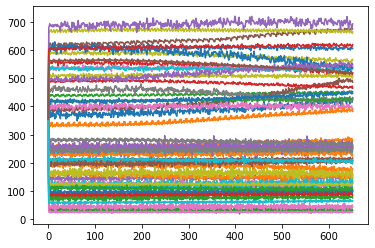

In [66]:
plt.plot(tf.transpose(gam_with_ar_likelihood.sample(50)[-1]));

In [67]:
run_mcmc = tf.function(tfp.experimental.mcmc.windowed_adaptive_nuts, autograph=False, jit_compile=True)

In [68]:
%%time
mcmc_samples, sampler_stats = run_mcmc(
    1000, gam_with_ar_likelihood, n_chains=4, num_adaptation_steps=1000,
    seed=tf.constant([-234272345, 73564234], dtype=tf.int32),
    observed=co2_by_month_training_data.T)

Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


2022-08-12 17:29:22.901906: I tensorflow/compiler/xla/service/service.cc:170] XLA service 0x7f7f2b02d1b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-08-12 17:29:22.902231: I tensorflow/compiler/xla/service/service.cc:178]   StreamExecutor device (0): Host, Default Version
2022-08-12 17:29:24.399074: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:263] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-08-12 17:29:25.864621: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator mcmc_retry_init/assert_equal_1/Assert/AssertGuard/Assert
2022-08-12 17:30:10.646141: I tensorflow/compiler/jit/xla_compilation_cache.cc:478] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


CPU times: user 2min 42s, sys: 3.02 s, total: 2min 45s
Wall time: 2min 59s


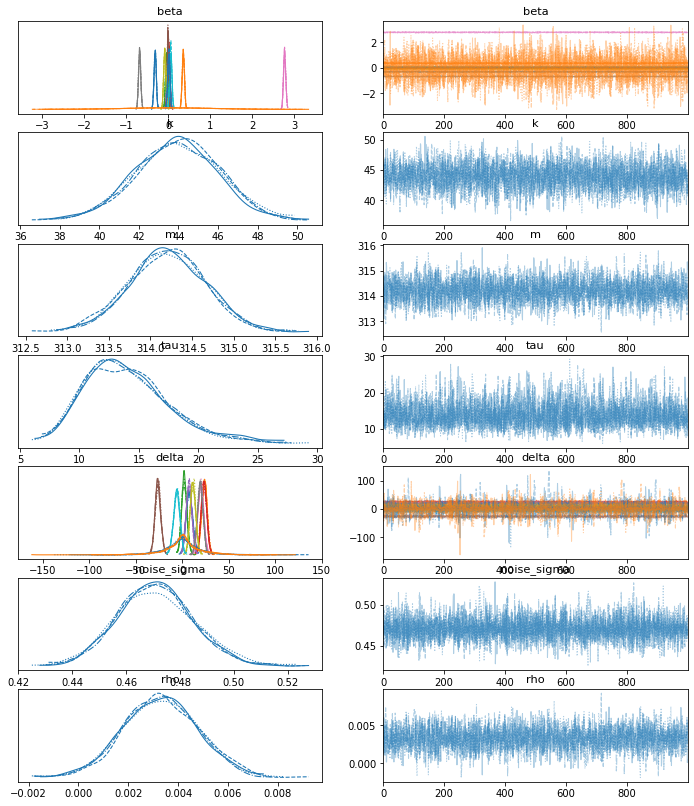

In [69]:
gam_ar_likelihood_idata = az.from_dict(
    posterior={
        k:np.swapaxes(v.numpy(), 1, 0)
        for k, v in mcmc_samples._asdict().items()}, 
    sample_stats={
        k:np.swapaxes(sampler_stats[k], 1, 0)
        for k in ["target_log_prob", "diverging", "accept_ratio", "n_steps"]}
)
axes = az.plot_trace(gam_ar_likelihood_idata, compact=True);

In [70]:
k, m, tau, delta = mcmc_samples[1:5]

In [71]:
growth_rate = k[..., None] + tf.einsum('ij,...j->...i', trend_design_matrix_a, delta)

In [72]:
offset = m[..., None] + tf.einsum('ij,...j->...i', trend_design_matrix_a, -s * delta)

In [73]:
trend_posterior = growth_rate * t + offset

In [74]:
seasonality_posterior = tf.einsum('ij,...j->...i', seasonality_design_matric_x_pred, mcmc_samples[0])

In [75]:
nchains = gam_ar_likelihood_idata.posterior.dims['chain']

In [76]:
nchains

4

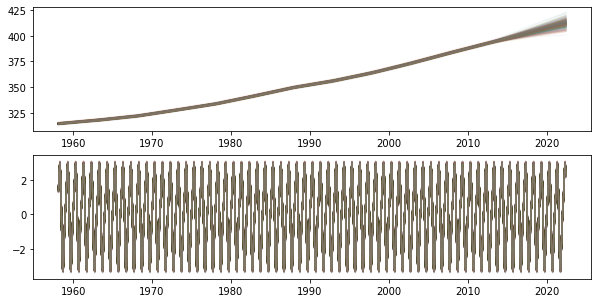

In [77]:
_, ax = plt.subplots(2, 1, figsize=(10, 5))
for i in range(nchains): 
    ax[0].plot(co2_by_month.index,
               trend_posterior[-100:, i, :].numpy().T, alpha=.05)
    ax[1].plot(co2_by_month.index,
               seasonality_posterior[-100:, i, :].numpy().T, alpha=.05)

In [78]:
gam_with_ar_likelihood_full = generate_gam_ar_likelihood(n_changepoints, 
                 trend_design_matrix_a, seasonality_design_matric_x_pred, 
                 n_pred, co2_by_month_training_data, s, t, training=False)

In [79]:
_, values = gam_with_ar_likelihood_full.sample_distributions(value=mcmc_samples)

In [80]:
values

StructTuple(
  beta=<tf.Tensor: shape=(1000, 4, 12), dtype=float32, numpy=
    array([[[-3.19433630e-01,  3.61915588e-01, -6.77682236e-02, ...,
              5.40744029e-02,  3.22819134e-04,  3.05165917e-01],
            [-2.97638297e-01,  3.81192982e-01, -4.01408933e-02, ...,
              5.03577590e-02,  4.87187728e-02, -1.92511988e+00],
            [-3.40907484e-01,  3.67845386e-01, -7.06697023e-03, ...,
              1.09419733e-01,  2.15004310e-02, -5.73702812e-01],
            [-3.00844103e-01,  4.05546755e-01, -7.57968472e-03, ...,
              1.05065085e-01,  1.85327325e-02,  7.04472661e-01]],
    
           [[-2.79569119e-01,  3.42334241e-01, -4.89885621e-02, ...,
              6.27199784e-02,  1.18721072e-02, -6.63958549e-01],
            [-3.19298983e-01,  3.56723279e-01, -1.12705193e-02, ...,
              8.97629559e-02,  2.74333227e-02,  7.18070924e-01],
            [-3.03817630e-01,  3.95723999e-01, -6.53315857e-02, ...,
              1.02062464e-01,  4.32353243e-02,

In [81]:
fitted_with_forecast = values[-1].numpy()

In [82]:
average_forecast = np.mean(fitted_with_forecast, axis=(0, 1)).T

In [83]:
# %load 'plot_co2_data.py'
def plot_co2_data(fig_ax=None):
    if not fig_ax:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    else:
        fig, ax = fig_ax
    ax.plot(co2_by_month_training_data, label="training data")
    ax.plot(co2_by_month_testing_data, color="C4", label="testing data")
    ax.legend()
    ax.set(
        ylabel="Atmospheric CO2 concentration (ppm)",
        xlabel="Year"
    )
    ax.text(0.99, .02,
              """Source: National Oceanic & Atmospheric Administraion 
                         Trends in Atmospheric Carbon Dioxide
              https://gml.noaa.gov/ccgg/trends/data.html""",
              transform=ax.transAxes,
              horizontalalignment="right",
              alpha=0.5)
    fig.autofmt_xdate()
    return fig, ax

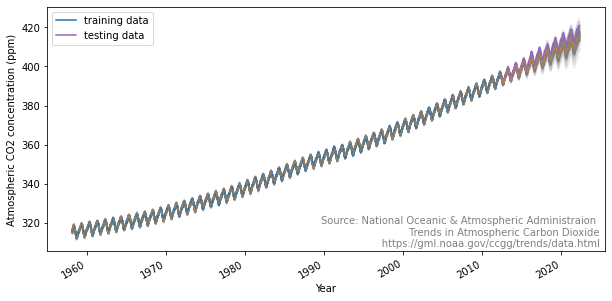

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(co2_by_month.index, fitted_with_forecast[-100:, 0, :].T, color='gray',
alpha=.1);
ax.plot(co2_by_month.index, fitted_with_forecast[-100:, 1, :].T, color='gray',
alpha=.1);
plot_co2_data((fig, ax));
ax.plot(co2_by_month.index, average_forecast, ls='--', label='GAM forecast',
alpha=.5);

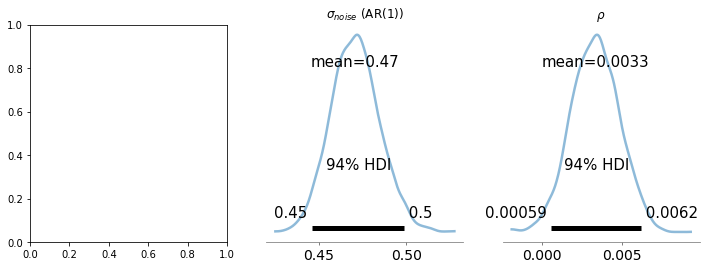

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(4*3, 4))

az.plot_posterior(gam_ar_likelihood_idata, var_names=['noise_sigma', 'rho'], alpha=.5, lw=2.5, ax=axes[1:]);
axes[1].set_title(r'$\sigma_{noise}$ (AR(1))')
axes[2].set_title(r'$\rho$')

plt.savefig("../plots/ar1_likelihood_rho.png");

In [86]:
from gam_with_latent_ar import generate_gam_ar_latent

In [87]:
gam_with_latent_ar = generate_gam_ar_latent(n_changepoints, 
                 trend_design_matrix_a, seasonality_design_matric_x_pred, 
                 n_pred, co2_by_month_training_data, s, t)

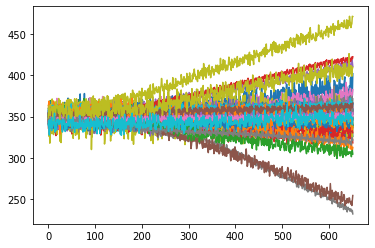

In [88]:
plt.plot(tf.transpose(gam_with_latent_ar.sample(50)[-1]));

In [89]:
%%time
mcmc_samples, sampler_stats = run_mcmc(
    1000, gam_with_latent_ar, n_chains=4, num_adaptation_steps=1000,
    seed=tf.constant([36245, 734565], dtype=tf.int32),
    observed=co2_by_month_training_data.T)

2022-08-12 17:37:14.316189: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator mcmc_retry_init/assert_equal_1/Assert/AssertGuard/Assert


CPU times: user 9min 41s, sys: 17.8 s, total: 9min 59s
Wall time: 11min 23s


In [90]:
mcmc_samples

StructTuple(
  beta=<tf.Tensor: shape=(1000, 4, 12), dtype=float32, numpy=
    array([[[-3.1179395e-01,  3.7969318e-01, -1.4387160e-02, ...,
              4.5532882e-02,  1.3217571e-03, -1.7059933e-01],
            [-2.8813443e-01,  3.7752968e-01, -3.1823784e-02, ...,
              7.3473014e-02,  1.3659529e-02,  1.1001983e+00],
            [-2.7690503e-01,  3.4311461e-01, -3.4661528e-02, ...,
              7.2051957e-02,  3.7855774e-02, -1.0863658e+00],
            [-3.1158948e-01,  3.6789930e-01, -4.3577656e-02, ...,
              7.7613048e-02,  1.4404423e-02,  4.6566188e-01]],
    
           [[-3.3749428e-01,  3.8346726e-01, -1.0826001e-02, ...,
              5.6158863e-02, -8.1842742e-04,  1.5684444e-02],
            [-3.0054632e-01,  3.6603570e-01, -2.4805482e-02, ...,
              8.6418770e-02,  1.5425095e-02,  7.2578394e-01],
            [-2.9600805e-01,  3.4677315e-01, -2.4226449e-02, ...,
              6.5063901e-02,  4.9197100e-02, -1.1594158e+00],
            [-3.2819334

In [91]:
sampler_stats

{'step_size': <tf.Tensor: shape=(1000,), dtype=float32, numpy=
 array([0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.0012253

In [92]:
nuts_trace_ar_latent = az.from_dict(
    posterior={
        k:np.swapaxes(v.numpy(), 1, 0)
        for k, v in mcmc_samples._asdict().items()}, 
    sample_stats={
        k:np.swapaxes(sampler_stats[k], 1, 0)
        for k in ["target_log_prob", "diverging", "accept_ratio", "n_steps"]}
)

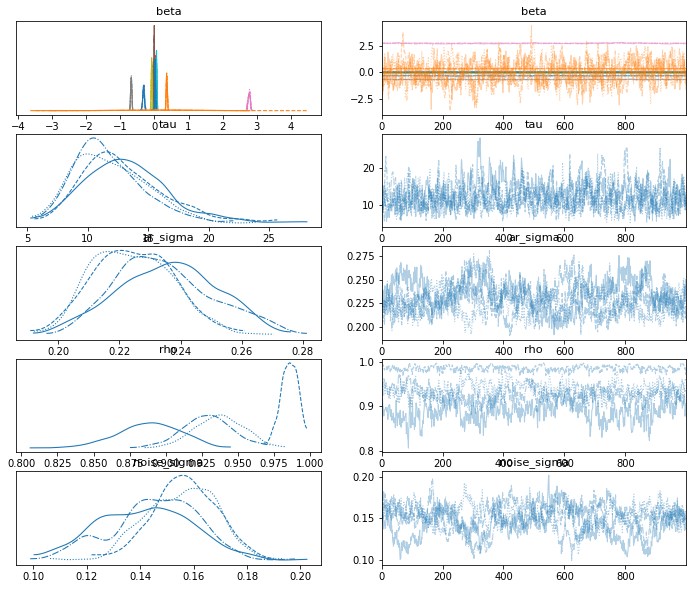

In [93]:
axes = az.plot_trace(
    nuts_trace_ar_latent,
    var_names=['beta', 'tau', 'ar_sigma', 'rho', 'noise_sigma'], 
    compact=True);

In [94]:
gam_with_latent_ar_full = generate_gam_ar_latent(n_changepoints, 
                 trend_design_matrix_a, seasonality_design_matric_x_pred, 
                 n_pred, co2_by_month_training_data, s, t, training=False)

In [95]:
posterior_dists, ppc_samples = gam_with_latent_ar_full.sample_distributions(
    value=mcmc_samples)

In [96]:
posterior_dists

StructTuple(
  beta=<tfp.distributions.Sample 'beta' batch_shape=[] event_shape=[12] dtype=float32>,
  k=<tfp.distributions.HalfNormal 'k' batch_shape=[] event_shape=[] dtype=float32>,
  m=<tfp.distributions.Normal 'm' batch_shape=[] event_shape=[] dtype=float32>,
  tau=<tfp.distributions.HalfNormal 'tau' batch_shape=[] event_shape=[] dtype=float32>,
  delta=<tfp.distributions.Sample 'delta' batch_shape=[1000, 4] event_shape=[12] dtype=float32>,
  noise_sigma=<tfp.distributions.HalfNormal 'noise_sigma' batch_shape=[] event_shape=[] dtype=float32>,
  ar_sigma=<tfp.distributions.HalfNormal 'ar_sigma' batch_shape=[] event_shape=[] dtype=float32>,
  rho=<tfp.distributions.Uniform 'rho' batch_shape=[] event_shape=[] dtype=float32>,
  temporal_error=<tfp.distributions.Autoregressive 'temporal_error' batch_shape=? event_shape=? dtype=float32>,
  observed=<tfp.distributions.Independent 'observed' batch_shape=[1000, 4] event_shape=[772] dtype=float32>
)

In [97]:
ppc_samples

StructTuple(
  beta=<tf.Tensor: shape=(1000, 4, 12), dtype=float32, numpy=
    array([[[-3.1179395e-01,  3.7969318e-01, -1.4387160e-02, ...,
              4.5532882e-02,  1.3217571e-03, -1.7059933e-01],
            [-2.8813443e-01,  3.7752968e-01, -3.1823784e-02, ...,
              7.3473014e-02,  1.3659529e-02,  1.1001983e+00],
            [-2.7690503e-01,  3.4311461e-01, -3.4661528e-02, ...,
              7.2051957e-02,  3.7855774e-02, -1.0863658e+00],
            [-3.1158948e-01,  3.6789930e-01, -4.3577656e-02, ...,
              7.7613048e-02,  1.4404423e-02,  4.6566188e-01]],
    
           [[-3.3749428e-01,  3.8346726e-01, -1.0826001e-02, ...,
              5.6158863e-02, -8.1842742e-04,  1.5684444e-02],
            [-3.0054632e-01,  3.6603570e-01, -2.4805482e-02, ...,
              8.6418770e-02,  1.5425095e-02,  7.2578394e-01],
            [-2.9600805e-01,  3.4677315e-01, -2.4226449e-02, ...,
              6.5063901e-02,  4.9197100e-02, -1.1594158e+00],
            [-3.2819334

In [98]:
beta, k, m, tau, delta = mcmc_samples[:5]

In [99]:
growth_rate = k[..., None] + tf.einsum('ij,...j->...i', trend_design_matrix_a, delta)

In [100]:
offset = m[..., None] + tf.einsum('ij,...j->...i', trend_design_matrix_a, -s * delta)

In [101]:
trend_posterior = growth_rate * t + offset

In [102]:
seasonality_posterior = tf.einsum('ij,...j->...i', seasonality_design_matric_x_pred, beta)

In [103]:
temporal_error = mcmc_samples[-1]

In [104]:
nchains_2 = nuts_trace_ar_latent.posterior.dims['chain']

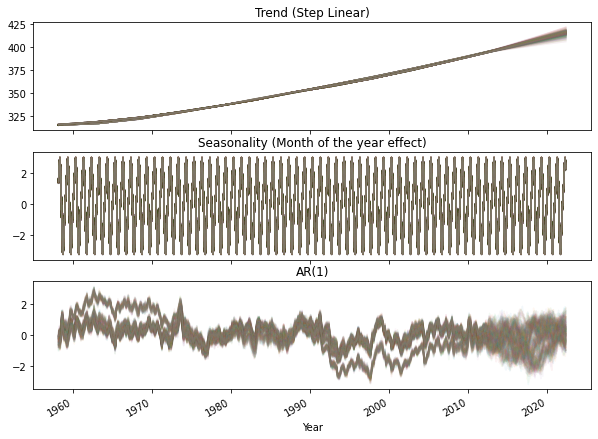

In [105]:
fig, ax = plt.subplots(3, 1, figsize=(10, 7.5), sharex=True)

for i in range(nchains_2):
    ax[0].plot(co2_by_month.index, trend_posterior[-100:, i, :].numpy().T, alpha=.05);
    ax[1].plot(co2_by_month.index, seasonality_posterior[-100:, i, :].numpy().T, alpha=.05);
    ax[2].plot(co2_by_month.index, temporal_error[-100:, i, :].numpy().T, alpha=.05);
    
ax[0].set_title('Trend (Step Linear)')
ax[1].set_title('Seasonality (Month of the year effect)')
ax[2].set_title('AR(1)')
ax[2].set_xlabel("Year")
fig.autofmt_xdate()

plt.savefig("../plots/posterior_predictive_ar1.png");

In [106]:
fitted_with_forecast = ppc_samples[-1].numpy()

In [107]:
fitted_with_forecast

array([[[316.16772, 317.2948 , 317.9477 , ..., 415.35202, 416.3683 ,
         416.32864],
        [315.9967 , 317.36737, 317.62503, ..., 415.93127, 416.31552,
         415.47525],
        [315.9794 , 317.39322, 317.71188, ..., 418.16092, 418.6641 ,
         418.035  ],
        [316.32385, 317.2363 , 317.4456 , ..., 414.77185, 414.92355,
         414.59787]],

       [[315.88083, 317.92682, 317.5067 , ..., 419.59375, 420.4719 ,
         420.2836 ],
        [315.8223 , 317.2755 , 317.64536, ..., 416.04648, 417.23538,
         416.3516 ],
        [315.93018, 317.56967, 317.9888 , ..., 415.75113, 416.0203 ,
         415.32898],
        [315.7336 , 317.6602 , 317.93878, ..., 413.3229 , 414.374  ,
         413.53622]],

       [[316.2565 , 317.30707, 317.6085 , ..., 418.92438, 419.9505 ,
         419.00217],
        [316.32147, 317.44037, 317.77454, ..., 416.13025, 416.4262 ,
         416.32642],
        [315.89163, 317.4788 , 317.84283, ..., 417.6258 , 418.01147,
         417.69785],
      

In [108]:
average_forecast = np.mean(fitted_with_forecast, axis=(0, 1)).T

In [109]:
average_forecast

array([315.9524 , 317.31815, 317.64844, 317.2667 , 316.01437, 314.6452 ,
       313.01065, 312.49658, 313.43707, 314.6585 , 315.5941 , 316.32642,
       316.7502 , 317.8128 , 318.3748 , 318.06223, 316.62494, 314.84933,
       313.61185, 313.40128, 314.67752, 315.62494, 316.43893, 317.00293,
       317.70016, 319.09583, 319.957  , 319.52896, 318.0943 , 315.89273,
       314.1361 , 313.87378, 315.0002 , 316.1656 , 316.97488, 317.6923 ,
       318.50412, 319.62515, 320.4539 , 319.86087, 318.5603 , 316.6967 ,
       315.04913, 315.14062, 316.09497, 317.07507, 317.968  , 318.62543,
       319.5788 , 320.6269 , 321.09503, 320.6754 , 319.49207, 317.45297,
       316.00998, 315.54953, 316.66254, 317.74115, 318.66843, 319.14923,
       319.9554 , 321.38095, 322.12064, 321.45425, 319.8074 , 317.76962,
       316.15622, 315.98834, 317.12253, 318.37573, 319.47015, 320.03436,
       320.74622, 321.86322, 322.32782, 321.86963, 320.45996, 318.56012,
       316.76346, 316.75708, 317.70175, 318.72916, 

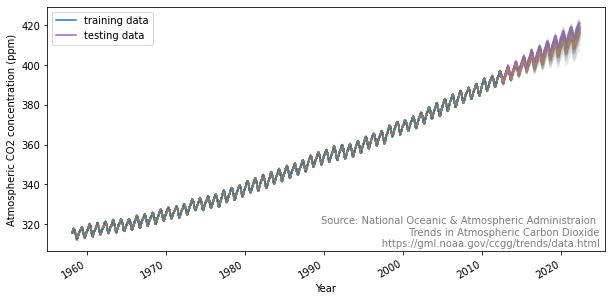

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(co2_by_month.index, fitted_with_forecast[-100:, 0, :].T, color='gray',
alpha=.1);
ax.plot(co2_by_month.index, fitted_with_forecast[-100:, 1, :].T, color='gray',
alpha=.1);

plot_co2_data((fig, ax));

ax.plot(co2_by_month.index, average_forecast, ls='--', label='GAM forecast',
alpha=.5);

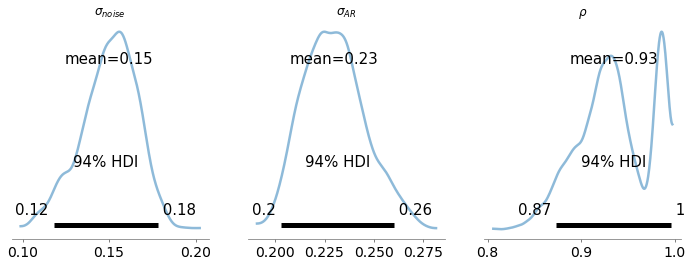

In [111]:
axes = az.plot_posterior(
    nuts_trace_ar_latent,
    var_names=['noise_sigma', 'ar_sigma', 'rho'],
    alpha=.5, lw=2.5,
    figsize=(4*3, 4));
axes[0].set_title(r'$\sigma_{noise}$') 
axes[1].set_title(r'$\sigma_{AR}$') 
axes[2].set_title(r'$\rho$')

plt.savefig("../plots/ar1_likelihood_rho2.png");

### Latent AR Process and Smoothing


In [112]:
num_steps = 100

In [113]:
x = np.linspace(0, 50, num_steps)

In [114]:
x

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

In [115]:
f = np.exp(1.0 + np.power(x, 0.5) - np.exp(x/15.0))

In [116]:
y = f + np.random.normal(scale=1.0, size=x.shape)

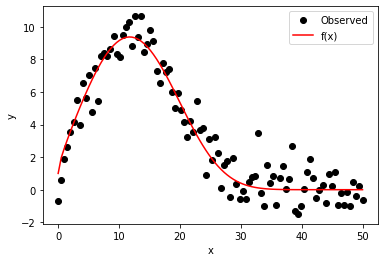

In [117]:
plt.plot(x, y, 'ok', label='Observed')
plt.plot(x, f, 'r', label='f(x)')
plt.legend()
plt.xlabel('x');
plt.ylabel('y');

In [118]:
from smoothing_grw import generate_smoothing_grw

In [119]:
smoothing_grw = generate_smoothing_grw(num_steps)

In [120]:
%%time
mcmc_samples, sampler_stats = run_mcmc(
    1000, smoothing_grw, n_chains=4, num_adaptation_steps=1000, 
    observed=tf.constant(y[None, ...], dtype=tf.float32))

Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.


2022-08-12 17:45:48.422302: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-08-12 17:45:48.422520: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-08-12 17:45:48.480615: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-08-12 17:45:48.480696: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-08-12 17:45:48.529997: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-08-12 17:45:48.530147: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-08-12 17:45:48.559277: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed 

CPU times: user 1min 1s, sys: 1.35 s, total: 1min 3s
Wall time: 1min 9s


In [121]:
mcmc_samples

StructTuple(
  var0=<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
    array([[0.496527  , 0.4480987 , 0.45665535, 0.6628983 ],
           [0.45906994, 0.45410764, 0.6400639 , 0.44475722],
           [0.67219347, 0.45566547, 0.6199339 , 0.500482  ],
           ...,
           [0.64199066, 0.5570636 , 0.4716872 , 0.46944207],
           [0.6978879 , 0.4672553 , 0.6251868 , 0.5309416 ],
           [0.59866077, 0.5386808 , 0.5418327 , 0.60069233]], dtype=float32)>,
  var1=<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
    array([[1.077521 , 1.2152761, 1.2831768, 1.4685171],
           [1.0602087, 1.2121567, 1.0664709, 1.4607785],
           [1.2074142, 1.1863685, 1.1947637, 1.4927553],
           ...,
           [1.092834 , 1.3436992, 1.2583377, 1.1514838],
           [1.9735271, 1.4225924, 1.7681634, 1.2910393],
           [1.1895291, 1.6052958, 1.0303426, 1.26671  ]], dtype=float32)>,
  var2=<tf.Tensor: shape=(1000, 4, 100), dtype=float32, numpy=
    array([[[-5.95715702e-01,  1

In [122]:
sampler_stats

{'step_size': <tf.Tensor: shape=(1000,), dtype=float32, numpy=
 array([0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.02298359, 0.02298359,
        0.02298359, 0.02298359, 0.02298359, 0.0229835

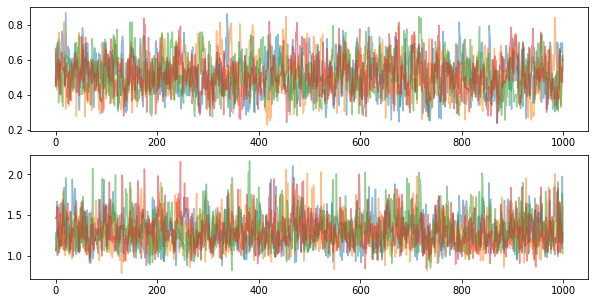

In [123]:
_, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].plot(mcmc_samples[0], alpha=.5)
ax[1].plot(mcmc_samples[1], alpha=.5);

In [124]:
nsample, nchain = mcmc_samples[-1].shape[:2]

In [125]:
nsample

1000

In [126]:
nchain

4

In [127]:
mcmc_samples[-1].shape

TensorShape([1000, 4, 100])

In [128]:
tf.math.cumsum(mcmc_samples[-1], axis=-1)

<tf.Tensor: shape=(1000, 4, 100), dtype=float32, numpy=
array([[[-5.95715702e-01,  5.24341285e-01,  1.93494487e+00, ...,
          2.04305589e-01,  4.22457725e-01, -9.07493949e-01],
        [ 5.42534292e-01, -2.23150492e-01,  1.32865083e+00, ...,
         -7.42310405e-01, -6.39438927e-01, -1.20385337e+00],
        [-3.35950136e-01,  5.11436939e-01,  1.73444736e+00, ...,
         -1.29086733e-01,  4.50797915e-01, -5.59039831e-01],
        [-1.29818514e-01,  9.30137336e-01,  2.19925952e+00, ...,
         -3.57192665e-01, -2.86755472e-01, -1.21698987e+00]],

       [[ 2.38617390e-01,  7.85749197e-01,  8.67825985e-01, ...,
         -2.35042736e-01, -1.23893246e-01,  3.47509533e-02],
        [ 4.18137461e-01,  2.07761216e+00,  2.29678392e+00, ...,
         -2.86784917e-01, -5.08645296e-01, -1.58040971e-01],
        [-1.27807721e-01,  4.44606483e-01,  1.26967478e+00, ...,
         -5.05038142e-01, -4.23794597e-01, -1.88655347e-01],
        [ 1.76036805e-01,  1.36020410e+00,  2.48211861e+00, 

In [129]:
z = tf.reshape(tf.math.cumsum(mcmc_samples[-1], axis=-1), [nsample*nchain, -1])

In [130]:
z

<tf.Tensor: shape=(4000, 100), dtype=float32, numpy=
array([[-0.5957157 ,  0.5243413 ,  1.9349449 , ...,  0.20430559,
         0.42245772, -0.90749395],
       [ 0.5425343 , -0.22315049,  1.3286508 , ..., -0.7423104 ,
        -0.6394389 , -1.2038534 ],
       [-0.33595014,  0.51143694,  1.7344474 , ..., -0.12908673,
         0.45079792, -0.55903983],
       ...,
       [-0.4831076 ,  0.9181645 ,  0.7478016 , ...,  0.8603633 ,
         0.5391866 , -0.3578109 ],
       [-0.05592286,  0.9955157 ,  2.5009127 , ..., -0.44766366,
        -0.3274021 , -0.27961448],
       [-0.02901229,  1.2615176 ,  1.6209841 , ..., -0.23484951,
        -0.11038928,  0.13107671]], dtype=float32)>

In [131]:
tf.reduce_mean(z, axis=0)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([ 2.8861577e-02,  7.8870040e-01,  1.7643342e+00,  2.5994322e+00,
        3.4198391e+00,  4.1398430e+00,  4.8385806e+00,  4.8367376e+00,
        5.7998371e+00,  5.8857965e+00,  6.2887821e+00,  5.8776083e+00,
        6.6595020e+00,  6.5360751e+00,  7.6236229e+00,  8.1249323e+00,
        8.3208790e+00,  8.6294394e+00,  8.9257746e+00,  8.6291227e+00,
        8.6804438e+00,  9.3077059e+00,  9.7261171e+00,  9.8615665e+00,
        9.5189629e+00,  9.9802685e+00,  9.7056284e+00,  9.8497562e+00,
        9.1095505e+00,  9.1028185e+00,  9.2201586e+00,  8.7072668e+00,
        7.7302876e+00,  7.2104168e+00,  7.3979468e+00,  7.1705985e+00,
        6.9005170e+00,  6.1255608e+00,  5.5142488e+00,  5.4589086e+00,
        4.8697391e+00,  4.2752161e+00,  3.8195429e+00,  4.0040464e+00,
        3.9756284e+00,  4.4219050e+00,  3.7718403e+00,  3.2675433e+00,
        2.2132301e+00,  2.5590270e+00,  2.2758007e+00,  2.5127883e+00,
        1.9774632e+00,  1.075

In [132]:
lower, upper = np.percentile(z, [5, 95], axis=0)

In [133]:
lower

array([-0.80136322, -0.05473126,  0.92007846,  1.74963306,  2.54864562,
        3.28065277,  3.92982508,  3.97694653,  4.91173251,  5.01080434,
        5.39518948,  4.99988868,  5.78146763,  5.65882885,  6.71620018,
        7.2640285 ,  7.48029189,  7.76125391,  8.06003814,  7.77154977,
        7.78479309,  8.43731275,  8.86736302,  8.97148523,  8.64643278,
        9.10660081,  8.85232282,  8.96346726,  8.2579731 ,  8.21795197,
        8.30934639,  7.82679045,  6.84883587,  6.34584246,  6.51804261,
        6.30698266,  6.03635275,  5.24648116,  4.62773728,  4.58830621,
        3.99572324,  3.38687537,  2.95210481,  3.14326462,  3.12301376,
        3.53063148,  2.88853813,  2.40327296,  1.30141544,  1.64950283,
        1.39038005,  1.63513697,  1.11121703,  0.15549469,  0.38298301,
        0.33726045, -0.35421982,  0.12830654, -0.45150809, -0.96650523,
       -0.95748374, -0.95608554, -0.47731781, -0.10100754,  0.19346267,
        0.78679178, -0.38660388, -0.87747726, -0.16078704, -0.36

In [134]:
upper

array([ 0.82110853,  1.64501613,  2.60904329,  3.45775418,  4.27410774,
        4.9994848 ,  5.72524426,  5.70841582,  6.69012227,  6.74166257,
        7.16159463,  6.80964663,  7.54871638,  7.43360038,  8.49216604,
        8.97360325,  9.14237666,  9.47755041,  9.81121035,  9.50517392,
        9.5796689 , 10.19659729, 10.58200097, 10.75415034, 10.40987601,
       10.84296174, 10.59085898, 10.71585965,  9.99072418,  9.97591777,
       10.08459797,  9.57217078,  8.60805321,  8.07693624,  8.29581861,
        8.04369984,  7.78799918,  7.01107266,  6.38969326,  6.34758008,
        5.75534315,  5.15679405,  4.70691609,  4.87191412,  4.85019817,
        5.31431327,  4.65197635,  4.12828627,  3.1244243 ,  3.42812278,
        3.13715194,  3.39386293,  2.79874023,  1.9867661 ,  2.15400587,
        2.1071103 ,  1.42886621,  1.86361569,  1.28388836,  0.82111425,
        0.8153979 ,  0.78658167,  1.24590252,  1.62480092,  1.97715436,
        2.7027131 ,  1.34739707,  0.94950397,  1.55977755,  1.37

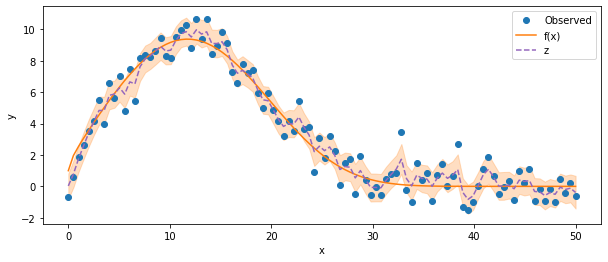

In [135]:
_, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, y, 'o', label='Observed')
ax.plot(x, f, label='f(x)')
ax.fill_between(x, lower, upper, color='C1', alpha=.25)
ax.plot(x, tf.reduce_mean(z, axis=0), color='C4', ls='--', label='z')
ax.legend()
ax.set_xlabel('x');
ax.set_ylabel('y');

plt.savefig("../plots/smoothing_with_gw.png");

### (S)AR(I)MA(X)

### Continue to the notebook time_series_tfp_autoregressive_sarimax.ipynb